# <center>  Linear and logistic regression  - 20 / 10 / 2020 </center>#

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bounhar Abdelaziz
* <span style="color:red">Auteur</span>           : Yu Yeh
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo


# <center> <span style="color:red"><font size="+3"> Assignment Linear and logistic regression  </font></span> </center> #


# Libraries Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the ours helpers
from helpers import *

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# Useful starting lines
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Loading the data.

### Data Preparation 

In [4]:
def loadDataset(path) :
    df = pd.read_csv(path, delimiter=',')
    return df

In [5]:
path = "data/USA_Housing.csv"
df = loadDataset(path)

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Data Analysis

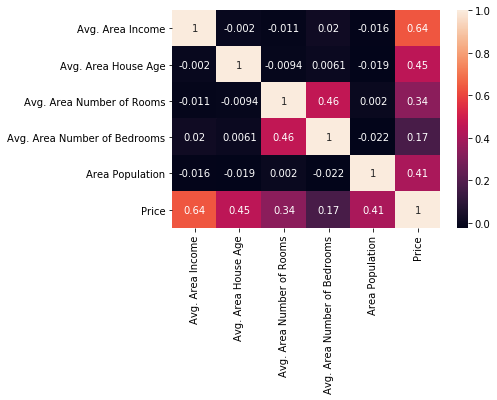

<Figure size 1440x720 with 0 Axes>

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(20,10))
plt.show()

### Comments :
* The price is highly correlated with the Average area income, the Average area House Age and the Area population.*
* The price is not realy related/correlated to the Average Area Number of Bedrooms. In fact this makes sens, because this feature is not really representative.

In [8]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

features = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]]
corr_result = features.corr(method=histogram_intersection).to_numpy()
print(corr_result)

[[1.00000000e+00 2.98861000e+04 3.49390000e+04 1.99066000e+04
  1.80309324e+08]
 [2.98861000e+04 1.00000000e+00 2.88881000e+04 1.94647000e+04
  2.98861000e+04]
 [3.49390000e+04 2.88881000e+04 1.00000000e+00 1.99058000e+04
  3.49390000e+04]
 [1.99066000e+04 1.94647000e+04 1.99058000e+04 1.00000000e+00
  1.99066000e+04]
 [1.80309324e+08 2.98861000e+04 3.49390000e+04 1.99066000e+04
  1.00000000e+00]]


In [9]:
def SeperateData(data, ratio):
    
    """ 
    This function splits the data into training and testing sequences with respect to the ratio of testing size. 
    """
    N_train = int(len(data) * ratio)
    N_test = len(data) - N_train
    train_data = data[0:N_train]
    test_data = data[N_train:data.shape[0]]

    return train_data, test_data

def linearRegression(features, target):
    features = np.insert(features, 0, 1, axis=1)
    A = np.dot(features.T, features)
    b = np.dot(features.T, target)
    print(A.shape)
    print(b.shape)
    w =  np.linalg.solve(A, b)

    return w

def Evaluation(features, w, target):
    features = np.insert(features, 0, 1, axis=1)
    prediciton = np.dot(features, w) 
    return prediciton

In [10]:
data = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"]]
data = data.sample(frac=1).reset_index(drop=True)

train_data, test_data = SeperateData(data, 0.75)

train_f = train_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]].to_numpy()
train_t = train_data["Price"].to_numpy().reshape(train_data.shape[0], 1)

test_f = test_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]].to_numpy()
test_t = test_data["Price"].to_numpy().reshape(test_data.shape[0], 1)

In [11]:
w = linearRegression(train_f, train_t)

(6, 6)
(6, 1)


rms: 82.27622577711405


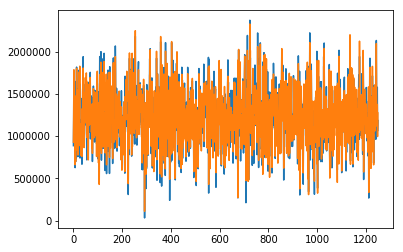

In [12]:
prediciton = Evaluation(test_f, w, test_t)

rms_error = np.sqrt(np.mean(np.square(test_t - prediciton))) / test_t.shape[0]
print("rms:", rms_error)

plt.plot(test_t)
plt.plot(prediciton)
plt.show()

### Comments :
* We can see that adding the bias plays a great role in the learning phase !

# Playing arround withe the Gender Dataset

In [13]:
# load data
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)


Use `least_squares` to compute w, and visualize the results.

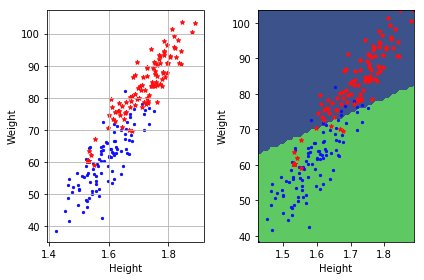

In [14]:
def least_squares(y, tx):
    """calculate the least squares."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

def least_square_classification_demo(y, x):
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [15]:
def sigmoid(t):
    """Apply sigmoid function on t"""
    return 1 / (1 + np.exp(np.multiply(t, -1)))

In [16]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    
    return np.sqrt(np.mean(np.square(tx.dot(w) - y))) / tx.shape[0]
    

In [17]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    
    return tx.T.dot(sigmoid(tx.dot(w)) - y)

In [18]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

g = calculate_gradient(y, tx, w)

#print(cost)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [19]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    w = w - gamma * grad
    
    return loss, w

## Demo :D

Current iteration=0, loss=0.003570714214271425
Current iteration=100, loss=0.017041630748575624
Current iteration=200, loss=0.019246279912172995
Current iteration=300, loss=0.02045282944304348
Current iteration=400, loss=0.021143090834112085
Current iteration=500, loss=0.021551154423677544
Current iteration=600, loss=0.0217971524673739
Current iteration=700, loss=0.02194718687523738
Current iteration=800, loss=0.022039337605476404
Current iteration=900, loss=0.022096178939437102
Current iteration=1000, loss=0.022131332515061275
Current iteration=1100, loss=0.0221531084722182
Current iteration=1200, loss=0.022166611129274726
Current iteration=1300, loss=0.022174988931766282
Current iteration=1400, loss=0.022180188983875006
Current iteration=1500, loss=0.022183417393905776
Current iteration=1600, loss=0.022185422022234485
loss=0.022186627633311983


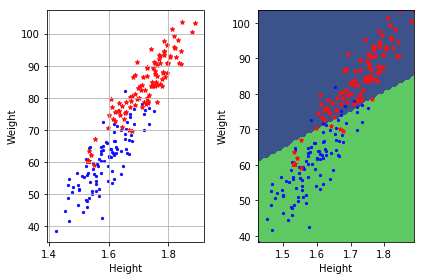

In [20]:
def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 100000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)